<a href="https://colab.research.google.com/github/danma2010/crc_calc/blob/main/FFT_Exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the FFT Algorithm 

https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/


An Interactive Guide To The Fourier Transform

https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

Python code for
MATHEMATICS OF THE DISCRETE FOURIER TRANSFORM (DFT) WITH AUDIO APPLICATIONS

https://ccrma.stanford.edu/~jos/mdft/mdft-python.html




Some more FFT info:

3Bl1Br video:
https://www.youtube.com/watch?v=spUNpyF58BY

thatSaneKid/fourier/Fourier Transform - A Visual Introduction.ipynb
Fourier Transform - A Visual Introduction.ipynb
https://github.com/thatSaneKid/fourier/blob/16662e484f25e954be27ff352760c0e662668aea/Fourier%20Transform%20-%20A%20Visual%20Introduction.ipynb
https://github.com/danma2010/fourier.git


3b1b/manim
https://github.com/3b1b/manim.git

Main video on the Fourier transform
https://youtu.be/spUNpyF58BY


Louis de Broglie thesis: 
http://aflb.ensmp.fr/LDB-oeuvres/De_B...


But what is a Fourier series? From heat flow to drawing with circles
https://www.youtube.com/watch?v=r6sGWTCMz2k&list=PLZHQObOWTQDN52m7Y21ePrTbvXkPaWVSg&index=1

The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever?

https://www.youtube.com/watch?v=h7apO7q16V0c


FFT pdf

https://www.cs.cmu.edu/afs/andrew/scs/cs/15-463/2001/pub/www/notes/fourier/fourier.pdf

DSP Imlementation

https://www.ti.com/lit/an/spra152/spra152.pdf


DFT processing gain

https://flylib.com/books/en/2.729.1/dft_processing_gain.html

https://dsp.stackexchange.com/questions/16330/fft-processing-gain

Deciamtion in Time and Frequency (DIT, DIF)

https://www.quora.com/What-is-the-difference-between-decimation-in-time-and-decimation-in-frequency

https://dsp.stackexchange.com/questions/48057/fft-implementation-with-decimation-in-frequency-vs-decimation-in-time




FFT Examples

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import blackman
from scipy.signal import hamming
import random as rnd



def makeSine(n,f,a,p):
  x = np.arange(n)
  sineVec = a*np.cos(2*np.pi*p + 2*np.pi * f * x)

  return sineVec

def makeCSine(n,f,a,p):
  x = np.arange(n)
  #sineVec = a*np.exp(2*np.pi*p + 2*np.pi*1j* f * x)
  sineVec = a*np.exp(2*np.pi*(p + 1j* f * x))

  return sineVec

def makeKSine(n,k):
  x = np.arange(n)
  sineVec = np.exp(-2j*np.pi*k*x/n)

  return sineVec


In [ ]:
n = 64
k=0

for k in range(32):
  y = makeKSine(n,k)
  x = np.arange(n)

  plt.figure()
  plt.title(str(k))
  plt.plot(x,np.real(y),np.imag(y))

  plt.figure()
  plt.title(str(k))
  plt.plot(np.real(y),np.imag(y))


Computing the Discrete Fourier Transform 

Direct approach 


In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random


def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    #x = np.asarray(x, dtype=float)
    #plt.figure()
    #plt.title("signal - real/imag")
    #plt.plot(np.real(x))
    #plt.plot(np.imag(x)) 
    N = x.shape[0]

    #print("DFT: N={}".format(N))   

    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    #print(M)
    xk = np.dot(M, x)
    #print(xk)
    return xk


FFT approach


In [5]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    #x = np.asarray(x, dtype=float)
    # get N from the shape of input
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 2:  # this cutoff should be optimized
        #return DFT_slow(x)
        #print("DFT-2")
        return [x[0]+x[1], x[0]-x[1]]
    else:
        #print("======")
        #print("N={}".format(N))

        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        #print("even")
        #print(X_even)
        #print("odd")
        #print(X_odd)
        #print(N/2)

        #print("factor")
        #print(factor[: int(N/2)])
        #print(factor[int(N/2) :])
        N2 = int(N/2)

        myfft = np.concatenate([X_even + factor[:N2] * X_odd,
                                X_even + factor[N2:] * X_odd])
        return myfft

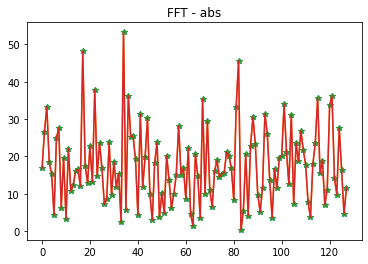

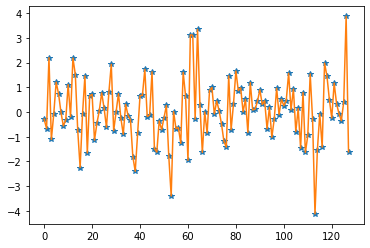

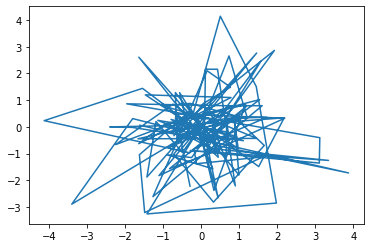

In [39]:
import random
N=128
A=2
c = np.zeros(N,dtype=np.complex128)

for i in range(c.__len__()):
  #c[i] = random.normalvariate(0,4)
  c[i] = (random.normalvariate(0,A))*np.exp(-2j*np.pi * (random.normalvariate(0,A)))
  #c[i] = 1j*(random.normalvariate(0,4))+(random.normalvariate(0,4))
  #print(c[i])
  #c[i] = random.uniform(-1,1)
  #c[i] = np.random()
  #print(random.random())
#c[2]=1
#c[3]=1
##c[4]=1
#c[5]=1
#print (c)
ck = FFT(c)

ck1 = np.fft.fft(c)

#print(ck)

plt.figure(1)
plt.title("myFFT - abs")
plt.plot(np.abs(ck),"*")
plt.plot(np.abs(ck))
plt.grid()

plt.figure(1)
plt.title("FFT - abs")
plt.plot(np.abs(ck1),"*")
plt.plot(np.abs(ck1))
plt.grid()

plt.figure(2)
plt.plot(c,"*")
plt.plot(c)

plt.figure()
plt.plot(np.real(c),np.imag(c))





In [ ]:
from matplotlib.bezier import NonIntersectingPathException
fft with noise
fft of uniform noise
fft of random
fft of WGN NonIntersectingPathExceptiontime measure of various DFT and FFT

<ipython-input-40-738c8b7eac4f>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)


64
31.999999999999993


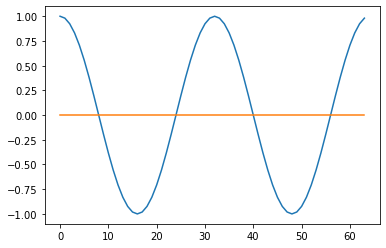

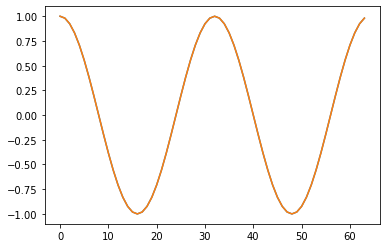

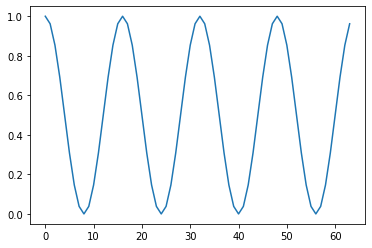

In [40]:
#@title Simple Tranfer steps
x = makeCSine(64,2/64,1,0)
x = np.asarray(x, dtype=float)

plt.figure()
plt.plot(np.real(x))
plt.plot(np.imag(x))


N = x.shape[0]
print(N)
n = np.arange(N)
#print(n)
k = n.reshape((N, 1))
#print(k)
M = np.exp(-2j * np.pi * k * n / N)

#plt.figure()
#plt.plot(M[1])

h = 62

plt.figure()
#plt.title(str(k))
#plt.plot(n,np.real(M[:,4]),np.imag(M[:,4]))
#plt.plot(np.real(M[:,4]),np.imag(M[:,4]))
#plt.plot(np.real(M[:,10]))
#plt.plot(np9.imag(M[:,10]))
#print(M[:,4])
#plt.plot(M[:,5])
#print(M[1,:])
plt.plot(x)
plt.plot(M[h])

plt.figure()
plt.plot(x * M[h])

print(abs(np.sum(x * M[h])))


In [ ]:
#@title Play with Phase
n = 64
f = 20/256
#a = [0.25-0.1, 0.25+0.3, 0.25-0.1, 0.25-0.1]
a = [0.2, 0.2, 0.2, 0.2, 0.2]
p = 0/4

#x = makeCSine(n,f,a[0],p) + makeCSine(n,f+1/n,a[1],p) + makeCSine(n,f+2/n,a[2],p) + makeCSine(n,f+3/n,a[3],p) + makeCSine(n,f+4/n,a[4],p)
#x = makeCSine(n,f,a[0],p) + makeCSine(n,f,a[1],p+1/n) + makeCSine(n,f,a[2],p+2/n) + makeCSine(n,f,a[3],p+3/n) + makeCSine(n,f,a[4],p+4/n)
x = makeSine(n,f,a[0],p)
y = makeSine(n,f,a[1],p+15/n)
plt.figure()
plt.plot(x)
plt.plot(y)

plt.figure()
plt.plot(x+y)

plt.figure()
plt.plot(x,y)

xPow = 969.7869631211835
4.77 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
xkPow = 969.7869631211834


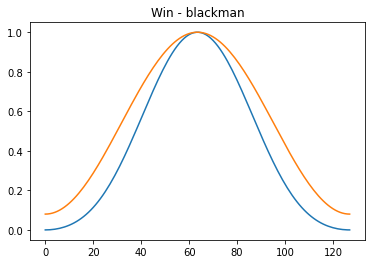

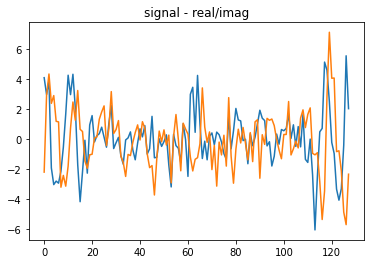

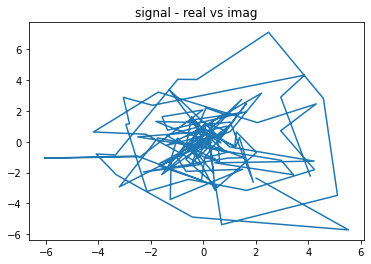

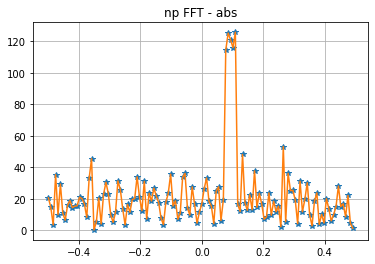

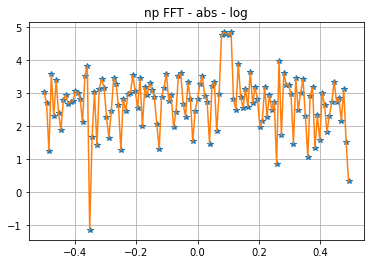

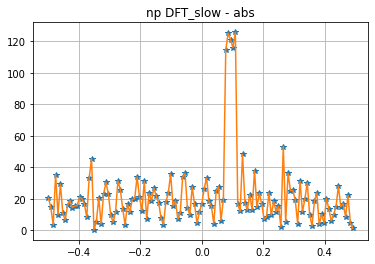

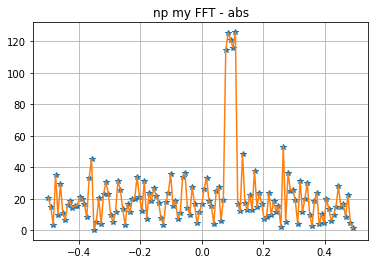

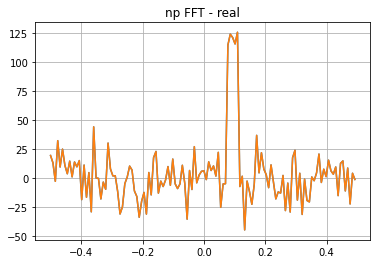

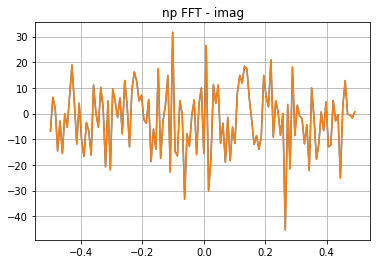

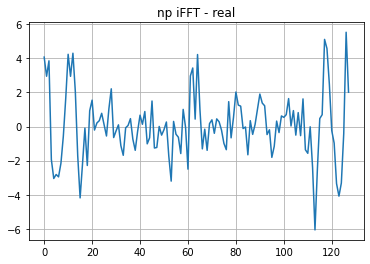

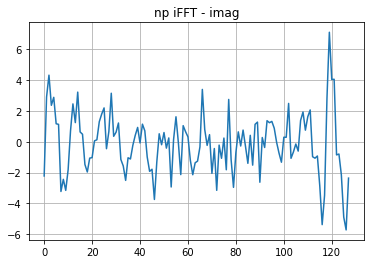

In [41]:

n = 128
f = 20/256
#a = [0.25-0.1, 0.25+0.3, 0.25-0.1, 0.25-0.1]
a = [0.2, 0.2, 0.2, 0.2, 0.2]
p = 15/64

#x = makeCSine(n,f,a[0],p) + makeCSine(n,f+4/n,a[4],p)
x = c+ makeCSine(n,f,a[0],p) + makeCSine(n,f+1/n,a[1],p) + makeCSine(n,f+2/n,a[2],p) + makeCSine(n,f+3/n,a[3],p) + makeCSine(n,f+4/n,a[4],p)

#x = makeCSine(n,f,a[0],p) + makeCSine(n,f,a[1],p+10/n) + makeCSine(n,f,a[2],p+20/n) + makeCSine(n,f,a[3],p+30/n) + makeCSine(n,f,a[4],p+40/n)
#x = makeCSine(n,f,a[0],p) + makeCSine(n,f,a[1],p) + makeCSine(n,f,a[2],p) + makeCSine(n,f,a[3],p) + makeCSine(n,f,a[4],p)

#xPow = np.sum(np.abs(x))
xPow = np.sum(pow(np.abs(x),2))

print("xPow = {}".format(xPow))

# Make Window
winB = blackman(n)
winH = hamming(n)
#winZ = np.concatenate(np.ones(n/2),np.zeros(n/2))

plt.figure()
plt.title("Win - blackman")
plt.plot(winB)
plt.plot(winH)

#x = x * winZ



plt.figure()
plt.title("signal - real/imag")
plt.plot(np.real(x))
plt.plot(np.imag(x))

plt.figure()
plt.title("signal - real vs imag")
plt.plot(np.real(x),np.imag(x))



#fx = np.fft.fft(np.real(x))
xk = np.fft.fft(x)
xk_dft = DFT_slow(x)
xk_fft = FFT(x)

#%timeit DFT_slow(x)
#%timeit FFT(x)
%timeit np.fft.fft(x)


xkPow = (1/n)*np.sum(pow(np.abs(xk),2))

print("xkPow = {}".format(xkPow))


# Zero some
#xk[13]=0

## shift or not
ni = np.arange(n)/n

xk_shift     = np.fft.fftshift(xk)
xk_dft_shift = np.fft.fftshift(xk_dft)
xk_fft_shift = np.fft.fftshift(xk_fft)


ni = np.arange(-1*n/2, n/2)/n



plt.figure()
plt.title("np FFT - abs")
plt.plot(ni,np.abs(xk_shift),"*")
plt.plot(ni,np.abs(xk_shift))
plt.grid()

plt.figure()
plt.title("np FFT - abs - log")
plt.plot(ni,np.log(np.abs(xk_shift)),"*")
plt.plot(ni,np.log(np.abs(xk_shift)))
plt.grid()


plt.figure()
plt.title("np DFT_slow - abs")
plt.plot(ni,np.abs(xk_dft_shift),"*")
plt.plot(ni,np.abs(xk_dft_shift))
plt.grid()

plt.figure()
plt.title("np my FFT - abs")
plt.plot(ni,np.abs(xk_fft_shift),"*")
plt.plot(ni,np.abs(xk_fft_shift))
plt.grid()

plt.figure()
plt.title("np FFT - real")
plt.plot(ni,np.real(xk_shift))
plt.plot(ni,np.real(xk_dft_shift))
plt.grid()

plt.figure()
plt.title("np FFT - imag")
plt.plot(ni,np.imag(xk_shift))
plt.plot(ni,np.imag(xk_dft_shift))
#print(xk)
plt.grid()


ifx = np.fft.ifft(xk)


plt.figure()
plt.title("np iFFT - real")
plt.plot(np.real(ifx))
plt.grid()


plt.figure()
plt.title("np iFFT - imag")
plt.plot(np.imag(ifx))
plt.grid()

#print(ifx)


In [ ]:
print(np.sum(pow(np.abs(x),2)))


[2029.45377536 +0.j           15.57506281 -3.38650868j
   -9.56675154+11.77748946j ...    5.01309595 -1.22576346j
   -9.56675154-11.77748946j   15.57506281 +3.38650868j]
1.09 s ± 227 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
62 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


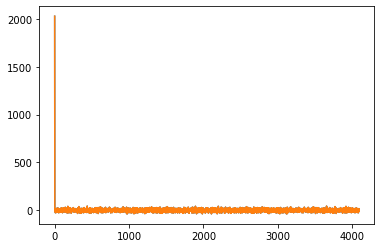

In [37]:
x = np.random.random(4096)
np.allclose(DFT_slow(x), np.fft.fft(x))
print(DFT_slow(x))
np.fft.fft(x)
plt.plot(np.fft.fft(x))
plt.plot(DFT_slow(x))
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

In [36]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()